# Introduction

# Calculation

In [318]:
import numpy as np
import pandas as pd
from plotnine import *
from numpy.linalg import eig

##  Define matrix

In [124]:
matrix = np.array([[5, 6], [5.8, 7], [6.7, 8.3], [7.4, 9],  [8, 10], [8.7, 12.1], [10, 15.2], [11.4, 16.7], [12, 18]])
print("Original Matrix: ")
print(matrix)

Original Matrix: 
[[ 5.   6. ]
 [ 5.8  7. ]
 [ 6.7  8.3]
 [ 7.4  9. ]
 [ 8.  10. ]
 [ 8.7 12.1]
 [10.  15.2]
 [11.4 16.7]
 [12.  18. ]]


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


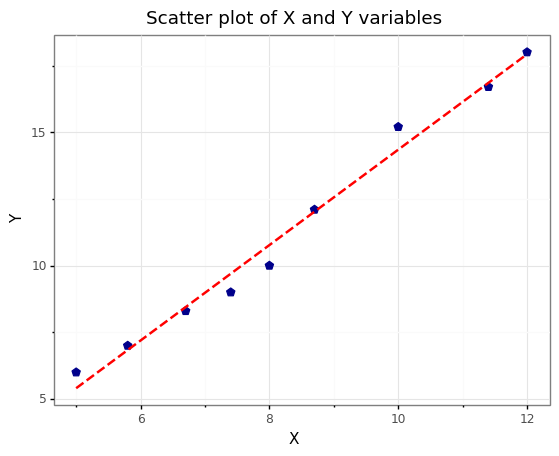

<ggplot: (-9223371925583096190)>

In [324]:
df = pd.DataFrame(matrix)
df.columns = ("X", "Y")

(
    ggplot(data=df, mapping = aes(x="X", y="Y"))
        + geom_point(color="darkblue", size=3, shape="p")
        + geom_smooth(method ="lm", se=False, color="red", linetype="dashed")
        + theme_bw()
        + labs(title = "Scatter plot of X and Y variables")
)

## Calculate the mean of each column

In [125]:
mean_col = np.mean(matrix, axis=0)
print("Mean of each columns: ")
print(mean_col)

Mean of each columns: 
[ 8.33333333 11.36666667]


## Center columns by substracting column means

In [232]:
center_matrix = matrix - mean_col
print("Center matrix: ")
print(center_matrix)

Center matrix: 
[[-3.33333333 -5.36666667]
 [-2.53333333 -4.36666667]
 [-1.63333333 -3.06666667]
 [-0.93333333 -2.36666667]
 [-0.33333333 -1.36666667]
 [ 0.36666667  0.73333333]
 [ 1.66666667  3.83333333]
 [ 3.06666667  5.33333333]
 [ 3.66666667  6.63333333]]


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


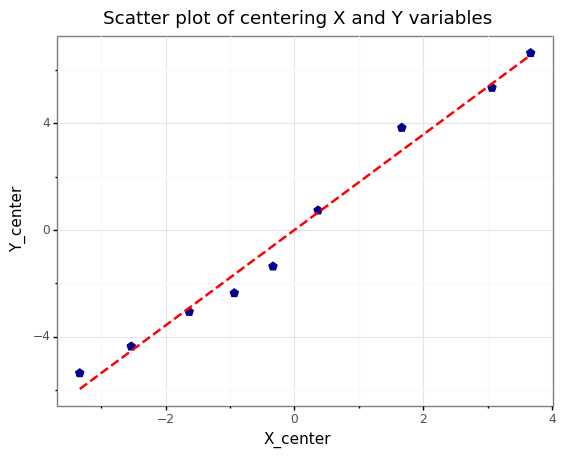

<ggplot: (111271840253)>

In [326]:
df_center = pd.DataFrame(center_matrix)
df_center.columns = ("X_center", "Y_center")

(
    ggplot(data=df_center, mapping = aes(x="X_center", y="Y_center"))
        + geom_point(color="darkblue", size=3, shape="p")
        + geom_smooth(method ="lm", se=False, color="red", linetype="dashed")
        + theme_bw()
        + labs(title = "Scatter plot of centering X and Y variables")
)

## Calculate covariance matrix of centered matrix - step by step

In [233]:
cov_matrix = np.dot(center_matrix.T, center_matrix)/(len(center_matrix)-1)
print("Covariance matrix: ")
print(cov_matrix)

Covariance matrix: 
[[ 5.8675 10.495 ]
 [10.495  19.0525]]


For calculation covariance matrix we can only use cov function implemented in numpy module. We have to remember that for this function each row of `m` represents a variable, and each column a single observation of all those variables.

In [317]:
cov_matrix = np.cov(matrix.T)
print("Covariance matrix: ")
print(cov_matrix)

Covariance matrix: 
[[ 5.8675 10.495 ]
 [10.495  19.0525]]


## Eigenvector-eigenvalue calculation


\begin{equation*}
\Sigma v = \lambda v
\end{equation*}

where 

$\Sigma$ - Covariance matrix \
$v$ - Eigenvector \
$\lambda$ - Eigenvalue 

We used eig function from numpy.linalg to calculate eigenvector and eigenvalue. 

In [315]:
values, vectors = eig(cov_matrix.T)
print("Eigen vectors: \n", vectors)
print("Eigen values: \n", values)

Eigen vectors: 
 [[-0.87519127 -0.48377705]
 [ 0.48377705 -0.87519127]]
Eigen values: 
 [ 0.06620796 24.85379204]


Formula for calculate eigenvector and eigenvalue is very simple. Below I will show you that our formula is correct in this calculation.

In [310]:
print("Covariance matrix: \n")
print(cov_matrix)

Covariance matrix: 

[[ 5.8675 10.495 ]
 [10.495  19.0525]]


In [311]:
print("Eigenvector: \n")
print(vectors)

Eigenvector: 

[[-0.87519127 -0.48377705]
 [ 0.48377705 -0.87519127]]


In [308]:
print("Eigenvalues: \n")
print(values)

Eigenvalues: 

[ 0.06620796 24.85379204]


In [309]:
print("Right side of formula: \n")
print(values*vectors)

Right side of formula: 

[[ -0.05794462 -12.02369426]
 [  0.03202989 -21.75182189]]


In [307]:
print("Left side of formula: \n")
print(np.dot(cov_matrix.T, vectors))

Left side of formula: 

[[ -0.05794462 -12.02369426]
 [  0.03202989 -21.75182189]]


We see that left and right sides of formula are equal so eigenvector and eigenvalues were calculated correctly.

## Project data on the new axes

In [306]:
projected_data = vectors.T.dot(center_matrix.T)
print("Projected data: \n")
print(projected_data.T)

Projected data: 

[[ 3.21034059e-01  6.30945000e+00]
 [ 1.04658094e-01  5.04723709e+00]
 [-5.41038828e-02  3.47408909e+00]
 [-3.28093837e-01  2.52281126e+00]
 [-3.69431548e-01  1.35735376e+00]
 [ 3.38663720e-02 -8.19191852e-01]
 [ 3.95826581e-01 -4.16119497e+00]
 [-1.03775622e-01 -6.15126975e+00]
 [ 1.97829565e-05 -7.57928463e+00]]


# Evaluation in sklearn

In [130]:
from sklearn.decomposition import PCA

In [174]:
model = PCA(n_components=2, svd_solver='full')
model.fit(matrix)
projected_data_model = model.transform(matrix)
print(projected_data_model)

[[-6.30945000e+00  3.21034059e-01]
 [-5.04723709e+00  1.04658094e-01]
 [-3.47408909e+00 -5.41038828e-02]
 [-2.52281126e+00 -3.28093837e-01]
 [-1.35735376e+00 -3.69431548e-01]
 [ 8.19191852e-01  3.38663720e-02]
 [ 4.16119497e+00  3.95826581e-01]
 [ 6.15126975e+00 -1.03775622e-01]
 [ 7.57928463e+00  1.97829565e-05]]


In [132]:
print("Mean of each columns (sklearn): ")
print(model.mean_)

Mean of each columns (sklearn): 
[ 8.33333333 11.36666667]


In [133]:
print("Covariance matrix (sklearn): ")
print(model.get_covariance())

Covariance matrix (sklearn): 
[[ 5.8675 10.495 ]
 [10.495  19.0525]]


In [134]:
print("Eigen vectors (sklearn): ", model.components_)

Eigen vectors (sklearn):  [[ 0.48377705  0.87519127]
 [-0.87519127  0.48377705]]


In [135]:
print("Explained variance (sklearn): ", model.explained_variance_ratio_)

Explained variance (sklearn):  [0.99734318 0.00265682]


# Visualization

In [177]:
df = pd.DataFrame(matrix)
df.columns = ("X", "Y")

df_pca = pd.DataFrame(projected_data.T)
df_pca.columns = ("X_pca", "Y_pca")

df_pca_model = pd.DataFrame(projected_data_model)
df_pca_model.columns = ("X_pca_model", "Y_pca_model")

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


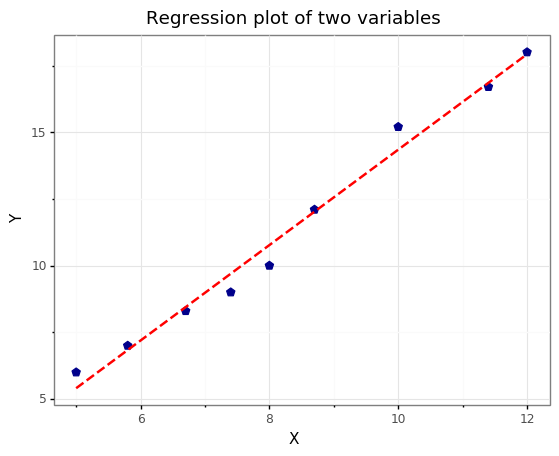

<ggplot: (-9223371925585623850)>

In [164]:
(
    ggplot(data = df, mapping = aes(x = "X", y = "Y")) 
    + geom_point(size=3, shape='p', color='darkblue')
    + geom_smooth(method="lm", color="red", linetype="dashed", se=False)
    + theme_bw()
    + labs(title = "Regression plot of two variables")
)

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


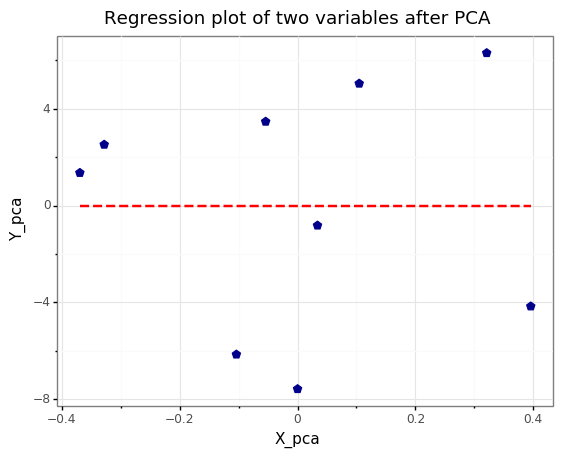

<ggplot: (111269764328)>

In [181]:
(
    ggplot(data = df_pca, mapping = aes(x = "X_pca", y = "Y_pca")) 
    + geom_point(size=3, shape='p', color='darkblue')
    + geom_smooth(method="lm", color="red", linetype="dashed", se=False)
    + theme_bw()
    + labs(title = "Regression plot of two variables after PCA")
)

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


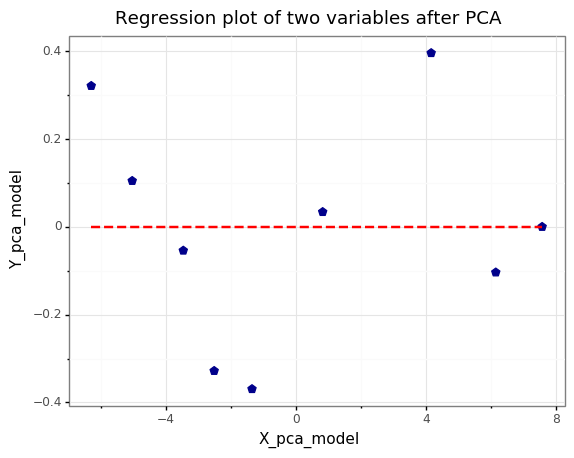

<ggplot: (-9223371925585180970)>

In [178]:
(
    ggplot(data = df_pca_model, mapping = aes(x = "X_pca_model", y = "Y_pca_model")) 
    + geom_point(size=3, shape='p', color='darkblue')
    + geom_smooth(method="lm", color="red", linetype="dashed", se=False)
    + theme_bw()
    + labs(title = "Regression plot of two variables after PCA")
)